In [1]:
%load_ext autoreload
%autoreload 2

# Main setup
import imagej
ij = imagej.init(['io.github.mianalysis:mia-plugin:2.0.0-SNAPSHOT'])

from jpype import JClass
from scyjava import jimport
from src.utilities.imagerenderer import NotebookImageRenderer
from src.utilities.store import Store
from src.wrappers.coordinatesetwrapper import CoordinateSetFactoryWrapper
from src.wrappers.imagewrapper import ImageWrapper, ImageFactoryWrapper
from src.wrappers.measurementwrapper import MeasurementFactoryWrapper
from src.wrappers.metadatawrapper import MetadataWrapper
from src.wrappers.objwrapper import ObjFactoryWrapper
from src.wrappers.objswrapper import ObjsFactoryWrapper
from src.wrappers.volumewrapper import VolumeFactoryWrapper
from src.wrappers.workspacewrapper import WorkspaceWrapper

from src.modules.demomodule import ModuleDemo

import time

Store.ij = ij

# Setting renderer
ImageI = jimport('io.github.mianalysis.mia.object.image.ImageI')
ImageI.setGlobalRenderer(NotebookImageRenderer())
ImageI.setUseGlobalImageRenderer(True)

# Setting image factory
ImageFactories = jimport('io.github.mianalysis.mia.object.image.ImageFactories')
image_factory = ImageFactoryWrapper()
ImageFactories.addFactory(image_factory)
ImageFactories.setDefaultFactory(image_factory)

# Setting objects factory (both obj and objs factories must be enabled together)
ObjsFactories = jimport('io.github.mianalysis.mia.object.ObjsFactories')
objs_factory = ObjsFactoryWrapper()
ObjsFactories.addFactory(objs_factory)
ObjsFactories.setDefaultFactory(objs_factory)

# Setting object factory (both obj and objs factories must be enabled together)
ObjFactories = jimport('io.github.mianalysis.mia.object.coordinates.ObjFactories')
obj_factory = ObjFactoryWrapper()
ObjFactories.addFactory(obj_factory)
ObjFactories.setDefaultFactory(obj_factory)

# Setting volume factory
VolumeFactories = jimport('io.github.mianalysis.mia.object.coordinates.volume.VolumeFactories')
volume_factory = VolumeFactoryWrapper()
VolumeFactories.addFactory(volume_factory)
VolumeFactories.setDefaultFactory(volume_factory)

# Setting coordinateset factory
CoordinateSetFactories = jimport('io.github.mianalysis.mia.object.coordinates.volume.CoordinateSetFactories')
coordinate_set_factory = CoordinateSetFactoryWrapper()
CoordinateSetFactories.addFactory(coordinate_set_factory)
CoordinateSetFactories.setDefaultFactory(coordinate_set_factory)

# Setting measurement factory
MeasurementFactories = jimport('io.github.mianalysis.mia.object.measurements.MeasurementFactories')
measurement_factory = MeasurementFactoryWrapper()
MeasurementFactories.addFactory(measurement_factory)
MeasurementFactories.setDefaultFactory(measurement_factory)

# Module imports
ImageLoader = jimport('io.github.mianalysis.mia.module.inputoutput.ImageLoader')
FilterImage = jimport('io.github.mianalysis.mia.module.images.process.FilterImage')
ThresholdImage = jimport('io.github.mianalysis.mia.module.images.process.threshold.GlobalAutoThreshold')
IdentifyObjects = jimport('io.github.mianalysis.mia.module.objects.detect.IdentifyObjects')
ShowImage = jimport('io.github.mianalysis.mia.module.visualise.ShowImage')
MeasureObjectShape = jimport('io.github.mianalysis.mia.module.objects.measure.spatial.MeasureObjectShape')
MeasureObjectCentroid = jimport('io.github.mianalysis.mia.module.objects.measure.spatial.MeasureObjectCentroid')
FilterByMeasurement = jimport('io.github.mianalysis.mia.module.objects.filter.FilterByMeasurement')
ShowObjectMeasurements = jimport('io.github.mianalysis.mia.module.visualise.ShowObjectMeasurements')

AvailableModules = jimport('io.github.mianalysis.mia.module.AvailableModules')

# # Example of adding modules
# print(AvailableModules.getModuleNames(True).size())
# AvailableModules.addModuleName(ModuleDemo(None))
# print(AvailableModules.getModuleNames(False).size())

# # Example of loading a module through reflection
# cl = JClass(str(AvailableModules.getModuleNames(False).get(42)))
# cc = cl(None) # The module constructor\
# print(cc.getShortDescription()) # Showing it's worked

[ERROR] Cannot create plugin: org.scijava.plugins.scripting.javascript.JavaScriptScriptLanguage


[INFO] Overriding MIA; identifier: command:io.github.mianalysis.mia.MIA_; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-plugin-2.0.0-SNAPSHOT.jar
[INFO] Overriding MIA (headless); identifier: command:io.github.mianalysis.mia.MIAHeadless; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-core-2.0.0-SNAPSHOT.jar


Operating in headless mode - the original ImageJ will have limited functionality.


Creating ImageWrapper with <java class 'ij.ImagePlus'>
Creating ImageWrapper with <java class 'ij.ImagePlus'>
Image: Implement getDppZ
Image: Implement getSpatialUnits
Image: Implement getFrameInterval
Image: Implement getTemporalUnits
Creating ImageWrapper with <java class 'ij.ImagePlus'>
Creating ImageWrapper with <java class 'ij.ImagePlus'>
Image: Implement getDppZ
Image: Implement getSpatialUnits
Image: Implement getFrameInterval
Image: Implement getTemporalUnits
IMPORTANT: Find out dimension order for np_img in Image class, but for now assuming XYCZT


Operating in headless mode - the WindowManager class will not be fully functional.


Objs: Add applySpatioTemporalCalibration to created image (convertToImage)
Creating ImageWrapper with <class 'NoneType'>
Creating ImageWrapper with <class 'NoneType'>
+-----------+--------------------+--------------------+--------------------+-----------+-------------------------+-------------------------+-------------------------+-------------------------+----------------------------+-------------------------+
| OBJECT_ID |  X_CENTROID (PX)   |  Y_CENTROID (PX)   | Z_CENTROID (SLICE) | TIMEPOINT | CENTROID // MEAN_X_(PX) | CENTROID // MEAN_X_(µm) | CENTROID // MEAN_Y_(PX) | CENTROID // MEAN_Y_(µm) | CENTROID // MEAN_Z_(SLICE) | CENTROID // MEAN_Z_(µm) |
+-----------+--------------------+--------------------+--------------------+-----------+-------------------------+-------------------------+-------------------------+-------------------------+----------------------------+-------------------------+
|     2     | 65.96025582457743  | 26.49474645957058  |        0.0         |     0     | 

[ERROR] java.lang.NullPointerException: Cannot invoke "ij.gui.Roi.getLength()" because the return value of "io.github.mianalysis.mia.object.coordinates.ObjI.getRoi(int)" is null
	at io.github.mianalysis.mia.module.objects.measure.spatial.MeasureObjectShape.lambda$process$0(MeasureObjectShape.java:355)
	at java.base/java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:572)
	at java.base/java.util.concurrent.FutureTask.run(FutureTask.java:317)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	at java.base/java.lang.Thread.run(Thread.java:1583)



<java object 'io.github.mianalysis.mia.object.system.Status'>

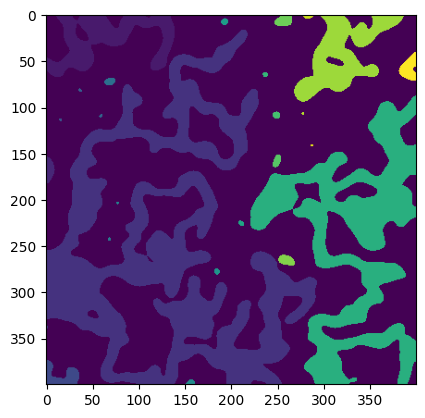

In [2]:
input_path = "/Users/sc13967/Documents/Programming/Python/mia-python/Ex3_Skeletonisation_1280.tif"
series_number = 1
image_name = "demo"
objects_name = "DNA"

workspace = WorkspaceWrapper(1, input_path, series_number, None)

imageLoader = ImageLoader(None)
imageLoader.updateParameterValue(ImageLoader.OUTPUT_IMAGE, image_name)
imageLoader.updateParameterValue(ImageLoader.SET_SPATIAL_CAL, True)
imageLoader.updateParameterValue(ImageLoader.XY_CAL, 1)
imageLoader.updateParameterValue(ImageLoader.Z_CAL, 1)
imageLoader.updateParameterValue(ImageLoader.CROP_MODE, ImageLoader.CropModes.FIXED)
imageLoader.updateParameterValue(ImageLoader.LEFT, 0)
imageLoader.updateParameterValue(ImageLoader.TOP, 0)
imageLoader.updateParameterValue(ImageLoader.WIDTH, 400)
imageLoader.updateParameterValue(ImageLoader.HEIGHT, 400)
imageLoader.setShowOutput(False)
imageLoader.process(workspace)

filterImage = FilterImage(None)
filterImage.updateParameterValue(FilterImage.INPUT_IMAGE, image_name)
filterImage.updateParameterValue(FilterImage.FILTER_MODE, FilterImage.FilterModes.GAUSSIAN2D)
filterImage.updateParameterValue(FilterImage.FILTER_RADIUS, 5)
filterImage.setShowOutput(False)
filterImage.process(workspace)

thresholdImage = ThresholdImage(None)
thresholdImage.updateParameterValue(ThresholdImage.INPUT_IMAGE, image_name)
thresholdImage.setShowOutput(False)
thresholdImage.process(workspace)

identifyObjects = IdentifyObjects(None)
identifyObjects.updateParameterValue(IdentifyObjects.INPUT_IMAGE, image_name)
identifyObjects.updateParameterValue(IdentifyObjects.OUTPUT_OBJECTS, objects_name)
identifyObjects.updateParameterValue(IdentifyObjects.SINGLE_OBJECT, False)
identifyObjects.updateParameterValue(IdentifyObjects.ENABLE_MULTITHREADING, False)
identifyObjects.setShowOutput(True)    
identifyObjects.process(workspace)

measureObjectShape = MeasureObjectShape(None)
measureObjectShape.updateParameterValue(MeasureObjectShape.INPUT_OBJECTS, objects_name)
measureObjectShape.updateParameterValue(MeasureObjectShape.MEASURE_PROJECTED_AREA, True)
measureObjectShape.updateParameterValue(MeasureObjectShape.MEASURE_VOLUME, True)
measureObjectShape.updateParameterValue(MeasureObjectShape.MEASURE_PROJECTED_DIA, False)
measureObjectShape.updateParameterValue(MeasureObjectShape.MEASURE_PROJECTED_PERIM, True)
measureObjectShape.updateParameterValue(MeasureObjectShape.ENABLE_MULTITHREADING, False)
measureObjectShape.setShowOutput(False)
measureObjectShape.process(workspace)

measureObjectCentroid = MeasureObjectCentroid(None)
measureObjectCentroid.updateParameterValue(MeasureObjectCentroid.INPUT_OBJECTS, objects_name)
measureObjectCentroid.setShowOutput(True)
measureObjectCentroid.process(workspace)


In [3]:
showObjectMeasurements = ShowObjectMeasurements(None)
showObjectMeasurements.updateParameterValue(ShowObjectMeasurements.INPUT_OBJECTS, objects_name)
showObjectMeasurements.setShowOutput(True)
showObjectMeasurements.process(workspace)

filterByMeasurement = FilterByMeasurement(None)
filterByMeasurement.updateParameterValue(FilterByMeasurement.INPUT_OBJECTS, objects_name)
filterByMeasurement.updateParameterValue(FilterByMeasurement.FILTER_MODE, FilterByMeasurement.FilterModes.REMOVE_FILTERED)
filterByMeasurement.updateParameterValue(FilterByMeasurement.FILTER_METHOD, FilterByMeasurement.FilterMethods.LESS_THAN)
filterByMeasurement.updateParameterValue(FilterByMeasurement.REFERENCE_MODE, FilterByMeasurement.ReferenceModes.FIXED_VALUE)
filterByMeasurement.updateParameterValue(FilterByMeasurement.MEASUREMENT, "SHAPE // N_VOXELS")
filterByMeasurement.updateParameterValue(FilterByMeasurement.REFERENCE_VALUE, "500")
filterByMeasurement.updateParameterValue(FilterByMeasurement.STORE_INDIVIDUAL_RESULTS, True)
filterByMeasurement.setShowOutput(False)

# import cProfile
# import pstats

# t1 = time.time_ns()
# with cProfile.Profile() as pr:
Exception = jimport('java.lang.Exception')
try:
    filterByMeasurement.process(workspace)
except Exception as ex: # type: ignore
    print("Exception:")
    ex.printStackTrace()
# t2 = time.time_ns()
# print(f'{(t2-t1)/1E9}s')

# stats = pstats.Stats(pr)
# stats.sort_stats(pstats.SortKey.TIME).print_stats(15)

showObjectMeasurements = ShowObjectMeasurements(None)
showObjectMeasurements.updateParameterValue(ShowObjectMeasurements.INPUT_OBJECTS, objects_name)
showObjectMeasurements.setShowOutput(True)
showObjectMeasurements.process(workspace)
    

+-----------+--------------------+--------------------+--------------------+-----------+-------------------+-----------------------+----------------------------+--------------------------+-------------------------------+-------------------------+---------------------------+--------------------------+-------------------------------+--------------------------+-------------------------------+---------------------------+-------------------------+------------------------------+-------------------------+------------------------------+----------------------------+------------------------------+
| OBJECT_ID |  X_CENTROID (PX)   |  Y_CENTROID (PX)   | Z_CENTROID (SLICE) | TIMEPOINT | SHAPE // N_VOXELS | SHAPE // VOLUME_(PX³) | SHAPE // VOLUME_(${SCAL}³) | SHAPE // BASE_AREA_(PX²) | SHAPE // BASE_AREA_(${SCAL}²) | SHAPE // HEIGHT_(SLICE) | SHAPE // HEIGHT_(${SCAL}) | SHAPE // PROJ_AREA_(PX²) | SHAPE // PROJ_AREA_(${SCAL}²) | SHAPE // PROJ_PERIM_(PX) | SHAPE // PROJ_PERIM_(${SCAL}) | SHAPE // PRO

<java object 'io.github.mianalysis.mia.object.system.Status'>

In [21]:
from typing import List
from src.wrappers.coordinatesetwrapper import CoordinateSetWrapper, CoordinateSetFactoryWrapper
from src.wrappers.measurementwrapper import MeasurementWrapper
from src.wrappers.objswrapper import ObjsWrapper, wrapObjs
from src.wrappers.objwrapper import ObjWrapper, ObjFactoryWrapper, wrapObj

from src.objects.coordinateset import CoordinateSet
from src.objects.measurement import  Measurement
from src.objects.obj import  Obj
from src.objects.objs import  Objs

import numpy as np

osw: ObjsWrapper = workspace.getObjects(objects_name)

In [24]:
o: Obj
for o in osw._objs.values():
    ow: ObjWrapper = wrapObj(o)
    print(ow.getMeasurements())

ObjWrapper: Need to implement custom list to handle python object removal
{}
ObjWrapper: Need to implement custom list to handle python object removal
{SHAPE // N_VOXELS=<jpype._jproxy.proxy.MeasurementWrapper object at 0x335de4640>, SHAPE // VOLUME_(PX³)=<jpype._jproxy.proxy.MeasurementWrapper object at 0x335dee440>, SHAPE // VOLUME_(${SCAL}³)=<jpype._jproxy.proxy.MeasurementWrapper object at 0x335dee670>, SHAPE // BASE_AREA_(PX²)=<jpype._jproxy.proxy.MeasurementWrapper object at 0x335defac0>, SHAPE // BASE_AREA_(${SCAL}²)=<jpype._jproxy.proxy.MeasurementWrapper object at 0x335deeee0>, SHAPE // HEIGHT_(SLICE)=<jpype._jproxy.proxy.MeasurementWrapper object at 0x335defbb0>, SHAPE // HEIGHT_(${SCAL})=<jpype._jproxy.proxy.MeasurementWrapper object at 0x336d354a0>, SHAPE // PROJ_AREA_(PX²)=<jpype._jproxy.proxy.MeasurementWrapper object at 0x336d35a90>, SHAPE // PROJ_AREA_(${SCAL}²)=<jpype._jproxy.proxy.MeasurementWrapper object at 0x336d35b30>, SHAPE // PROJ_PERIM_(PX)=<jpype._jproxy.proxy

In [17]:
ipl = ij.IJ.createHyperStack("test",64,52,3,4,2,8)
im2:ImageWrapper = ImageWrapper("te",ipl)
d = im2.getRawImage()
print(d.coords["row"])

Operating in headless mode - the IJ class will not be fully functional.


<xarray.DataArray 'row' (row: 52)> Size: 416B
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
       42., 43., 44., 45., 46., 47., 48., 49., 50., 51.])
Coordinates:
  * row      (row) float64 416B 0.0 1.0 2.0 3.0 4.0 ... 47.0 48.0 49.0 50.0 51.0


In [10]:
import sys
-sys.maxsize

-9223372036854775807

In [220]:
from src.wrappers.imagewrapper import ImageWrapper
from src.objects.image import Image, createImage
from xarray import DataArray

im: Image = createImage("trial", width=2, height=3, n_slices=1)
# i = 0
# for c in range(4):
#     for y in range(3):
#         for x in range(2):
#             im.putPixel(i, x=x, y=y, c=c)
#             i = i + 1
im.putAllPixels(vals=[400,200,300],x=np.array((0,1,0)),y=[1,1,0],z=[1,2,3])
print(im.getRawImage())
# print(im.getRawImage())
# da: DataArray = im.getRawImage()
# import numpy as np
# print(np_arr)
# idx = np.zeros((3,3),dtype=int)
# idx[0,1] = 1
# print(np_arr[tuple(idx)])

# indices: List[List[int]] = [[0]]*3
# indices[1] = [0,1,0]
# indices[0] = [1,1,0]
# indices[2] = list(np.zeros(len(indices[0]),dtype=int))
# print(indices)
# # indices[2] = [1,2,3]

np_arr[tuple(indices)] = [100,200,300]
# print(np_arr)
# # da.data[[1, 2, 0], [0, 1, 0], [1, 2, 3]] = [1,2,3]

[0. 0. 0.]
<xarray.DataArray 'trial' (row: 3, col: 2)> Size: 48B
array([[300.,   0.],
       [400., 200.],
       [  0.,   0.]])
Coordinates:
  * row      (row) int64 24B 0 1 2
  * col      (col) int64 16B 0 1
Attributes:
    spatial_units:   
    temporal_units:  


In [221]:
import numpy as np
z = np.zeros(3,dtype=np.uint8)
z[0] = 1
z[1] = 0
z[2] = 0
np_arr[tuple(z)]

np.float64(100.0)

In [86]:
from typing import List
indices: List[List[int]] = [[0]]*4
indices

[[0], [0], [0], [0]]